# SQLAlchemy, Sqlite, and Dates

## Setup

In [13]:
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
import pandas as pd

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
engine = create_engine("sqlite:///../Resources/dow.sqlite", echo=False)

In [5]:
engine.execute('SELECT * FROM dow LIMIT 5').fetchall()

[(1, 1, 'AA', '2011-01-07', 15.82, 16.72, 15.78, 16.42, 239655616, None),
 (2, 1, 'AA', '2011-01-14', 16.71, 16.71, 15.64, 15.97, 242963398, None),
 (3, 1, 'AA', '2011-01-21', 16.19, 16.38, 15.6, 15.79, 138428495, None),
 (4, 1, 'AA', '2011-01-28', 15.87, 16.63, 15.82, 16.13, 151379173, None),
 (5, 1, 'AA', '2011-02-04', 16.18, 17.39, 16.18, 17.14, 154387761, None)]

In [6]:
inspector = inspect(engine)
columns = inspector.get_columns('dow')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
quarter INTEGER
stock TEXT
date TEXT
open_price FLOAT
high_price FLOAT
low_price FLOAT
close_price FLOAT
volume INTEGER
percent_change FLOAT


## Reflect and query dates

In [7]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Dow = Base.classes.dow

In [8]:
session = Session(engine)

In [10]:
#total dates
session.query(func.count(Dow.date)).all()

[(750,)]

In [11]:
#earliest date
session.query(Dow.date).order_by(Dow.date).first()

('2011-01-07',)

In [24]:
#find all grater than 2011-03-01
session.query(Dow.date).\
    filter(Dow.date > '2011-03-01').\
    filter(Dow.date).all()

[('2011-03-04',),
 ('2011-03-11',),
 ('2011-03-18',),
 ('2011-03-25',),
 ('2011-03-04',),
 ('2011-03-11',),
 ('2011-03-18',),
 ('2011-03-25',),
 ('2011-03-04',),
 ('2011-03-11',),
 ('2011-03-18',),
 ('2011-03-25',),
 ('2011-03-04',),
 ('2011-03-11',),
 ('2011-03-18',),
 ('2011-03-25',),
 ('2011-03-04',),
 ('2011-03-11',),
 ('2011-03-18',),
 ('2011-03-25',),
 ('2011-03-04',),
 ('2011-03-11',),
 ('2011-03-18',),
 ('2011-03-25',),
 ('2011-03-04',),
 ('2011-03-11',),
 ('2011-03-18',),
 ('2011-03-25',),
 ('2011-03-04',),
 ('2011-03-11',),
 ('2011-03-18',),
 ('2011-03-25',),
 ('2011-03-04',),
 ('2011-03-11',),
 ('2011-03-18',),
 ('2011-03-25',),
 ('2011-03-04',),
 ('2011-03-11',),
 ('2011-03-18',),
 ('2011-03-25',),
 ('2011-03-04',),
 ('2011-03-11',),
 ('2011-03-18',),
 ('2011-03-25',),
 ('2011-03-04',),
 ('2011-03-11',),
 ('2011-03-18',),
 ('2011-03-25',),
 ('2011-03-04',),
 ('2011-03-11',),
 ('2011-03-18',),
 ('2011-03-25',),
 ('2011-03-04',),
 ('2011-03-11',),
 ('2011-03-18',),
 ('2011-03

In [16]:
#todays date
print(dt.date.today())
#specific date
print(dt.date(2017,10,8))

2022-07-26
2017-10-08


In [18]:
#date 9 weejs ago from today
weeks_ago = dt.date.today() - dt.timedelta(days=63)
weeks_ago

datetime.date(2022, 5, 24)

In [20]:
# Query for the Dow closing price for `CSCO` 1 week before `2011-04-08` using the datetime library
query_date = dt.date(2011,4,8) - dt.timedelta(days=7)
print("Query Date:", query_date)

Query Date: 2011-04-01


In [22]:
session.query(Dow.date, Dow.close_price).\
    filter(Dow.stock == 'CSCO').\
    filter(Dow.date == query_date).all()

[('2011-04-01', 17.04)]

In [21]:
#just day from datetime object
dt.date.today().strftime("%d")

'26'

In [23]:
# Query for all stocks, their opening and closing price that match
# following date string in the format `%d`
date_str = "14"
session.query(Dow.date, Dow.stock, Dow.open_price, Dow.close_price).\
    filter(func.strftime("%d", Dow.date) == date_str).all()

[('2011-01-14', 'AA', 16.71, 15.97),
 ('2011-01-14', 'AXP', 44.2, 46.25),
 ('2011-01-14', 'BA', 69.42, 70.07),
 ('2011-01-14', 'BAC', 14.17, 15.25),
 ('2011-01-14', 'CAT', 93.21, 94.01),
 ('2011-01-14', 'CSCO', 20.94, 21.21),
 ('2011-01-14', 'CVX', 90.95, 92.83),
 ('2011-01-14', 'DD', 48.3, 49.8),
 ('2011-01-14', 'DIS', 39.01, 39.29),
 ('2011-01-14', 'GE', 18.61, 18.82),
 ('2011-01-14', 'HD', 34.16, 35.89),
 ('2011-01-14', 'HPQ', 44.86, 46.25),
 ('2011-01-14', 'IBM', 147.0, 150.0),
 ('2011-01-14', 'INTC', 20.71, 21.08),
 ('2011-01-14', 'JNJ', 62.29, 62.55),
 ('2011-01-14', 'JPM', 43.27, 44.91),
 ('2011-01-14', 'KRFT', 30.91, 31.34),
 ('2011-01-14', 'KO', 62.7, 63.13),
 ('2011-01-14', 'MCD', 74.25, 74.06),
 ('2011-01-14', 'MMM', 85.7, 88.1),
 ('2011-01-14', 'MRK', 37.26, 34.23),
 ('2011-01-14', 'MSFT', 28.2, 28.3),
 ('2011-01-14', 'PFE', 18.22, 18.34),
 ('2011-01-14', 'PG', 64.4, 65.53),
 ('2011-01-14', 'T', 28.54, 28.43),
 ('2011-01-14', 'TRV', 53.12, 54.63),
 ('2011-01-14', 'UTX', 78.

## Analysis

Analyze the Average prices (open, high, low, close) for all stocks in the Month of May

In [25]:
# Query for the stock and average prices (open, high, low, close) 
# for all stock in the month of May
# Sort the result by stock name

sel = [Dow.stock, 
       func.avg(Dow.open_price), 
       func.avg(Dow.high_price), 
       func.avg(Dow.low_price), 
       func.avg(Dow.close_price)]

# YOUR CODE HERE
may_averages = session.query(*sel).\
    filter(func.strftime("%m", Dow.date) == "05").\
    group_by(Dow.stock).\
    order_by(Dow.stock).all()
may_averages

[('AA', 16.8475, 17.3375, 16.4175, 16.747500000000002),
 ('AXP', 49.89750000000001, 51.07, 49.315, 50.5025),
 ('BA', 78.7175, 79.2175, 76.8825, 78.2125),
 ('BAC', 12.0, 12.235, 11.7325, 11.8775),
 ('CAT', 108.5525, 110.5975, 104.045, 106.4),
 ('CSCO', 17.067500000000003, 17.255000000000003, 16.5925, 16.8575),
 ('CVX', 103.9725, 105.72749999999999, 100.4575, 102.76249999999999),
 ('DD', 53.9625, 54.9225, 52.14, 53.21),
 ('DIS', 42.3, 42.8175, 41.11749999999999, 41.900000000000006),
 ('GE', 19.96, 20.175, 19.4875, 19.740000000000002),
 ('HD', 36.765, 37.51, 36.504999999999995, 36.7625),
 ('HPQ', 39.315, 40.14, 37.8425, 38.54),
 ('IBM', 169.7025, 171.58, 166.9375, 169.11749999999998),
 ('INTC', 23.0975, 23.67, 22.652500000000003, 23.0225),
 ('JNJ', 65.6575, 66.8475, 65.0575, 66.08749999999999),
 ('JPM', 44.015, 44.709999999999994, 43.019999999999996, 43.527499999999996),
 ('KO', 67.5775, 68.32499999999999, 66.75750000000001, 67.4725),
 ('KRFT', 34.305, 35.0225, 33.945, 34.7375),
 ('MCD', 

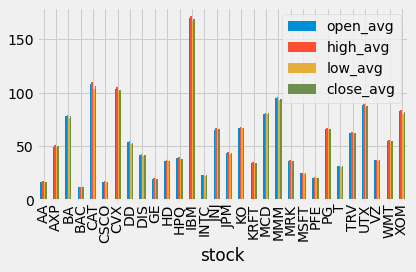

In [28]:
# Add the May averages into a DataFrame
# Plot the Results in a Matplotlib bar chart
# YOUR CODE HERE
df = pd.DataFrame(may_averages, columns = ["stock", "open_avg", "high_avg", "low_avg", "close_avg"])
df.set_index("stock", inplace=True)
df.plot.bar()
plt.tight_layout() #autofits plot
plt.show()

### Bonus
Calculate the high-low peak-to-peak (PTP) values for `IBM` stock after `2011-05-31`. 
* Note: high-low PTP is calculated using `high_price` - `low_price`
* Use a DateTime.date object in the query filter
* Use a list comprehension or numpy's ravel method to unpack the query's list of tuples into a list of PTP values.
* Use matplotlib to plot the PTP values as a boxplot

In [30]:
# Design a query to calculate the PTP for stock `IBM` after May, 2011
# YOUR CODE HERE
import datetime as dt
import numpy as np

date = dt.datetime(2011,5,31)

results = session.query(Dow.high_price - Dow.low_price).\
    filter(Dow.date > date).filter(Dow.stock == "IBM").all()

ptps = list(np.ravel(results))
ptps

[5.759999999999991, 3.0900000000000034, 3.579999999999984, 3.219999999999999]

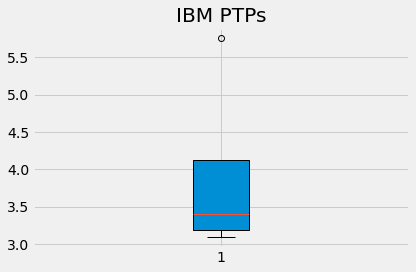

In [31]:
# Load the query into a dataframe, set the index to the date, and plot the ptps
# YOUR CODE HERE
fig, ax = plt.subplots()

x = range(len(ptps))
ax.boxplot(ptps, patch_artist=True) #patch artist fills box with color
ax.set_title("IBM PTPs")
fig.tight_layout()
plt.show()